In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
import time
import random
from copy import deepcopy
import glob

os.environ['KMP_DUPLICATE_LIB_OK']='True'

def visualize(figsize=(8, 4),**images):
    n = len(images)
    if n <= 4:
        plt.figure(figsize=figsize)
        for i, (name, image) in enumerate(images.items()):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(1, n, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.title(' '.join(name.split('_')).title())
            plt.imshow(image)
    else:
        num = math.ceil(n/2)
        plt.figure(figsize=figsize)
        for i, (name, image) in enumerate(images.items()):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(2, num, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.title(' '.join(name.split('_')).title())
            plt.imshow(image)
    plt.show()
    
def visualize_gray(figsize=(8, 4),**images):
    n = len(images)
    if n <= 4:
        plt.figure(figsize=figsize)
        for i, (name, image) in enumerate(images.items()):
            plt.subplot(1, n, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.title(' '.join(name.split('_')).title())
            plt.imshow(image, cmap='gray')
    else:
        num = math.ceil(n/2)
        plt.figure(figsize=figsize)
        for i, (name, image) in enumerate(images.items()):
            plt.subplot(2, num, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.title(' '.join(name.split('_')).title())
            plt.imshow(image, cmap='gray')
    plt.show()

## 打开图片   
opencv---BGR , matplotlib---RGB

In [2]:
#读取图片，查看图片属性,读取图片长宽
img = cv2.imread("D:\code\opencv_pic\opencv_logo.jpg")
print("图片属性是",img.shape,"高，宽，颜色通道")

h,w = img.shape[:2]

cv2.imshow("image", img) #全彩
cv2.imshow("blue", img[:,:,0]) #蓝色
cv2.imshow("red", img[:,:,2]) #红色

#灰度图
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", gray) 

cv2.waitKey(0)#窗口暂停，等待键盘输入
cv2.destroyAllWindows()

图片属性是 (250, 250, 3) 高，宽，颜色通道


### 图片大小变换  `cv2.resize`
fx,fy是缩放比例，interpolation插值方式   
### 剪裁图片   
crop = image[65:150, 0:250]#纵向，第65横行到第150横行
### 保存图片   
`cv2.imwrite`('保存命名名字', python名字img)

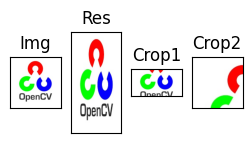

True

In [4]:
img = cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")

res = cv2.resize(img,None,fx=0.5, fy=1, interpolation = cv2.INTER_CUBIC)
# 同样 res = cv2.resize(img,(1*w, 2*h), interpolation = cv2.INTER_CUBIC)

crop1 = img[65:200, :] #纵向切割，第65横行到第200横行
crop2 = img[0:int(img.shape[0]/2), :int(img.shape[1]/2)] #四分之一

visualize(figsize=(3, 2),img=img,res=res,crop1=crop1,crop2=crop2)

cv2.imwrite(r"D:\code\opencv_pic\res.jpg",res)

## 绘画   
### 创建全黑画布 np.zeros([400, 400, 3], dtype=np.uint8)
在图上记入文字等

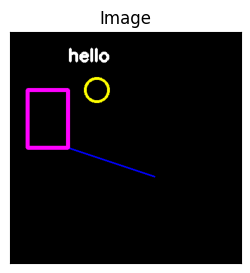

In [5]:
#创建300x300的黑色画布
image = np.zeros([400, 400, 3], dtype=np.uint8)

#画线段 (在哪张图上画, 起点坐标, 终点坐标, 颜色, 粗细)
cv2.line(image, (100, 200), (250, 250), (255, 0, 0), 2)

#画长方形 (在哪张图上画, 顶点坐标, 对角的顶点坐标, 颜色, 粗细)
cv2.rectangle(image, (30, 100), (100, 200), (255, 0, 255), 5)

#画圆 (在哪张图上画, 圆心坐标, 半径, 颜色, 粗细)
cv2.circle(image, (150, 100), 20, (0, 255, 255), 3)

#输入文字 (在哪张图上画, 文字内容, 位置（水平，竖直）, 字体序号，缩放系数，颜色, 粗细，线条类型：直线)
cv2.putText(image, "hello", (100, 50), 0, 1, (255, 255, 255), 3, 1)

visualize(figsize=(3, 3),image=image)

## 转换
放射变换`cv2.warpAffine(img, M,转换后图像尺寸(w,h),转换后空白区域填充色borderValue=(255,255,255))`     
2*3矩阵M = \begin{bmatrix} cos\theta & -sin\theta & tx\\ sin\theta & cos\theta   & ty \end{bmatrix}
透视变换`cv.warpPerspective`   

### 平移  `cv2.warpAffine`

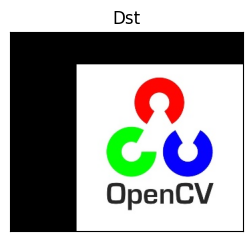

In [6]:
img = cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")

#横移100，纵移50
M = np.float32([[1,0,100],
                [0,1,50]]) 
dst = cv2.warpAffine(img,M,(w+100,h+50)) #(图片，变换矩阵，窗口长宽)

visualize(figsize=(3, 3),dst=dst)

## 旋转  
`cv2.getRotationMatrix2D (旋转中心，角度，缩放比例）`  +`cv2.warpAffine`   
旋转矩阵（逆时针）M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}

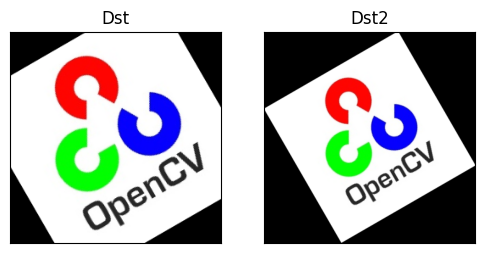

In [7]:
img = cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")
h,w,_ = img.shape

#计算出旋转用的变换矩阵
M = cv2.getRotationMatrix2D((w/2,h/2),30,1)
dst = cv2.warpAffine(img,M,(w,h))


### 变换后，自适应图片边框大小
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = h * sin + w * cos #旋转后图像的新宽度
new_h = h * cos + w * sin
a = M
a[0, 2] += (new_w - w) * 0.5 #以使图像在水平方向上居中
a[1, 2] += (new_h - h) * 0.5
new_w = int(np.round(new_w)) #四舍五入
new_h = int(np.round(new_h))
dst2 = cv2.warpAffine(img, a, (new_w, new_h))

visualize(figsize=(6, 3),dst=dst,dst2=dst2)

### 仿射变换   `cv2.getAffineTransform` + `cv2.warpAffine`   
三个点的前后变化

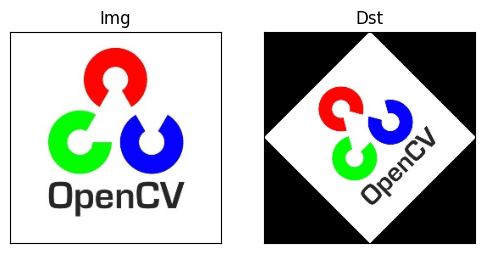

In [8]:
img = cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")
h,w,_ = img.shape
pts1 = np.float32([[0,0],[0,h],[w,0]])
pts2 = np.float32([[0,h/2],[w/2,h],[w/2,0]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(h,w))

visualize(figsize=(6, 3),img=img,dst=dst)

### 影射变换 projective   `cv2.getPerspectiveTransform` + `cv2.warpPerspective`   
四个点的前后变化

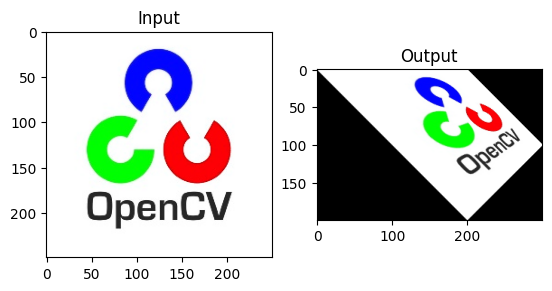

In [9]:
img = cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")
h,w,_ = img.shape
pts1 = np.float32([[0,0], [w,0],  [w, h], [0,h]])# 原始图像4端点
pts2 = np.float32([[0,0], [200,0], [300,100], [200, 200]])# 变换图像4点

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,200))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## <font color= #d60012>笔记 </font>
<font color= #0077ff>根据变化前后四点找M,</font> `cv2.getPerspectiveTransform(pts1,pts2)`   
<font color= #0077ff>根据特征点找M,</font>  M1, mask1 = `cv2.findHomography(keypoints1, keypoints2, cv2.RANSAC, 5.0)`   

<font color= #0077ff>四点的映射变换,</font> img1_transform = `cv2.perspectiveTransform(img1_edge, M1)`   
<font color= #0077ff>图片的映射变化,</font> dst = `cv2.warpPerspective(img,M,(300,300))`

#### 复原——变换矩阵的逆矩阵
reverseM = cv2.invertAffineTransform(M)

P -> 旋转后图像坐标Q
Q = np.dot(M,np.array([[P[0]],[P[1]],[1]]))

Q -> 原图像某点坐标P
reverseM = cv2.invertAffineTransform(M)
P = np.dot(reverseM,np.array([[Q[0]],[Q[1]],[1]]))

## 手动标记四边形轮廓，透视变换
<font color= #871F78 size=5>point：顺时针选点！</font>

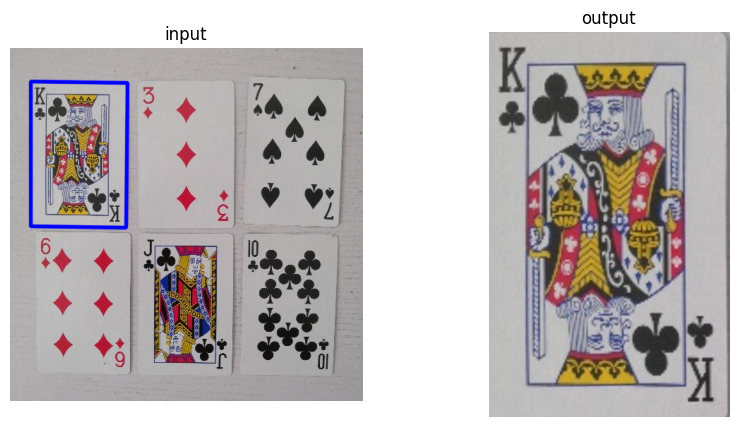

In [12]:
imgpath = r"D:\code\opencv_pic\poker.jpg" #输入图像
width, height = 500, 800 #输出图像尺寸

"""---以上需要手动调节---"""


image = cv2.imread(imgpath)
h1,w1 = image.shape[:2]

def select_points(event, x, y, flags, param):
    global pts1, count
    
    imageshow = image.copy()

    if event == cv2.EVENT_LBUTTONDOWN:
        if count < 4:
            pts1[count] = [x, y]
            count += 1
            cv2.circle(imageshow, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow('Select Points', imageshow)

count = 0
pts1 = np.zeros((4, 2), dtype=np.float32)

# 显示图像并等待用户选择四个点
# 顺时针选点！
cv2.namedWindow('Select Points', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Select Points', int(800*w1/h1), 800)
cv2.imshow('Select Points', image)
cv2.setMouseCallback('Select Points', select_points)
cv2.waitKey(0)
cv2.destroyAllWindows()

if count == 4:
    pts2 = np.array([[0, 0], [width ,0], [width,height], [0, height]], dtype=np.float32)
    M = cv2.getPerspectiveTransform(pts1, pts2)
    #输出图像
    dst = cv2.warpPerspective(image, M, (width, height))
    #在输入图像上框选变化区域
    imageshow = image.copy()
    imageshow = cv2.polylines(imageshow, [np.int32(pts1)], True, 255, 4, cv2.LINE_AA)
    
    img1 = cv2.cvtColor(imageshow, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1) 
    plt.title("input")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img2) 
    plt.title("output")
    plt.axis("off")
    plt.show()
    #保存输出图像
    #cv2.imwrite('D:/Output4.jpg', dst)
else:
    print("Please select four points.")

## 叠加图片

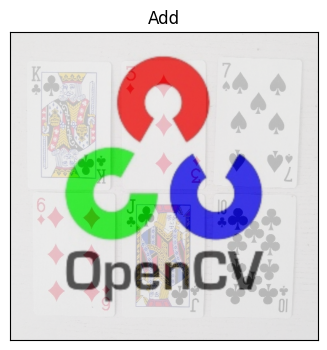

In [13]:
img1=cv2.imread(r"D:\code\opencv_pic\opencv_logo.jpg")
img2=cv2.imread(r"D:\code\opencv_pic\poker.jpg")
img1 = cv2.resize(img1,(img2.shape[0],img2.shape[1]))

add=cv2.addWeighted(img1,0.7,img2,0.3,0)
visualize(add=add)

## 亮度，对比度

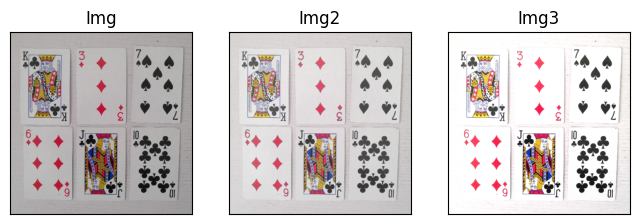

In [15]:
img=cv2.imread(r"D:\code\opencv_pic\poker.jpg")

alpha = 1  # 对比度
beta = 40  # 亮度
img2 = np.uint8(np.clip((alpha * img + beta), 0, 255))

alpha = 1.5  # 对比度
beta = 0  # 亮度
img3 = np.uint8(np.clip((alpha * img + beta), 0, 255))
visualize(img=img,img2=img2,img3=img3)

# 輪郭抽出   
`cv2.findContours`  二値画像を使い、黒い背景から白い物体の輪郭を検出

In [ ]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
canny = cv2.Canny(gray, 100, 200)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)

ret, binary = cv2.threshold(gray, 10, 205, cv2.THRESH_BINARY)
binary_adaptive = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
ret1, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

## 把图片二值化，自动找到mask

In [ ]:
# 读取图像
image = cv2.imread("D:\IMG_2882.JPG")

image = cv2.copyMakeBorder(image, 10, 10, 10, 10,
    cv2.BORDER_CONSTANT, (0,0,0))
# 将图像转换为灰度
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
## 进行直方图均衡化
img_equalized = cv2.equalizeHist(gray)

# 使用阈值进行二值化（根据实际情况调整阈值）
_, binary = cv2.threshold(img_equalized, 120, 255, cv2.THRESH_BINARY)

visualize(gray=gray,img_equalized=img_equalized,binary=binary)

In [ ]:
# 查找图像边缘
edges = cv2.Canny(binary, 30, 100)

# 可选：对边缘图像进行膨胀，以填充空隙
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# 可选：在原始图像上绘制边缘
result = image.copy()
result[dilated_edges != 0] = [0, 255, 0]  # 将边缘部分标记为绿色
visualize(binary=binary,dilated_edges =dilated_edges,result=result)

In [ ]:
#自动找四边形角点，然后透视变化
#二值化——滤波——膨胀——腐蚀——找最外边轮廓——拟合四边形——四个顶点映射——透视变换
def Img_Outline(input_dir):
    original_img = cv2.imread(input_dir)
    gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_img, (1, 1), 0)                     # 高斯模糊去噪（设定卷积核大小影响效果）
    _, RedThresh = cv2.threshold(blurred, 165, 255, cv2.THRESH_BINARY)  # 设定阈值165（阈值影响开闭运算效果）
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))          # 定义矩形结构元素
    closed = cv2.morphologyEx(RedThresh, cv2.MORPH_CLOSE, kernel)       # 闭运算（链接块）
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)           # 开运算（去噪点）
    return original_img, gray_img, RedThresh, closed, opened


def findContours_img(original_img, opened):
    contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #c = sorted(contours, key=cv2.contourArea, reverse=True)[1]   # 计算最大轮廓的旋转包围盒
    #rect = cv2.minAreaRect(c)                                    # 获取包围盒（中心点，宽高，旋转角度）
    #box = np.int0(cv2.boxPoints(rect))                           # box
    #box[]
    #draw_img = cv2.drawContours(original_img.copy(), [box], -1, (0, 0, 255), 3)
    draw_img=original_img.copy()
    cv2.drawContours(draw_img, contours, -1, (255, 0, 0), 2)

    #拟合四边形
    cnt_len = cv2.arcLength(contours[0], True)
    box = cv2.approxPolyDP(contours[0], 0.02 * cnt_len, True)
    if len(box) == 4:
        cv2.drawContours(draw_img, [box], -1, (255, 255, 0), 3)

    box_after =[0]*4
    #排好序的角点输出，0号是左上角，顺时针输出
    box_after[0] = box[1]
    box_after[1] = box[0]
    box_after[2] = box[3]
    box_after[3] = box[2]
    print("box_after[0]:", box_after[0])
    print("box_after[1]:", box_after[1])
    print("box_after[2]:", box_after[2])
    print("box_after[3]:", box_after[3])
    return box_after,draw_img
    #return draw_img
def Perspective_transform(box,original_img):
    # # 获取画框宽高(x=orignal_W,y=orignal_H)
    # orignal_W = math.ceil(np.sqrt((box[3][1] - box[2][1])**2 + (box[3][0] - box[2][0])**2))
    # orignal_H= math.ceil(np.sqrt((box[3][1] - box[0][1])**2 + (box[3][0] - box[0][0])**2))
    #
    # # 原图中的四个顶点,与变换矩阵
    # pts1 = np.float32([box[0], box[1], box[2], box[3]])
    # pts2 = np.float32([[int(orignal_W+1),int(orignal_H+1)], [0, int(orignal_H+1)], [0, 0], [int(orignal_W+1), 0]])
    #
    # # 生成透视变换矩阵；进行透视变换
    # M = cv2.getPerspectiveTransform(pts1, pts2)
    # result_img = cv2.warpPerspective(original_img, M, (int(orignal_W+3),int(orignal_H+1)))
    #

    ROTATED_SIZE_W = 600  # 透视变换后的表盘图像大小
    ROTATED_SIZE_H = 800  # 透视变换后的表盘图像大小
    # 原图中书本的四个角点(左上、右上、右下、左下),与变换后矩阵位置
    #pts1 = np.float32([[63, 72], [163, 32], [268, 144], [150, 215]])
    pts1 = np.float32([box[0], box[1], box[2], box[3]])
    # 变换后矩阵位置
    pts2 = np.float32([[0, 0], [ROTATED_SIZE_W, 0], [ROTATED_SIZE_W, ROTATED_SIZE_H], [0, ROTATED_SIZE_H], ])
    # 生成透视变换矩阵；进行透视变换
    M = cv2.getPerspectiveTransform(pts1, pts2)
    result_img = cv2.warpPerspective(original_img, M, (ROTATED_SIZE_W, ROTATED_SIZE_H))


    return result_img

if __name__=="__main__":
    input_dir = "B.png"
    original_img, gray_img, RedThresh, closed, opened = Img_Outline(input_dir)
    box, draw_img = findContours_img(original_img,opened)
    #draw_img = findContours_img(original_img, opened)
    result_img = Perspective_transform(box,original_img)
    cv2.imshow("original", original_img)
    cv2.imshow("gray", gray_img)
    cv2.imshow("closed", closed)
    cv2.imshow("opened", opened)
    cv2.imshow("draw_img", draw_img)
    cv2.imshow("result_img", result_img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

### 模板匹配算法 cv2.matchTemplate

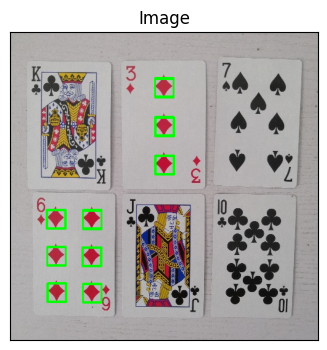

In [64]:
image = cv2.imread("D:/SUN/mypython/opencv_tutorial/poker.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#匹配模板：一个菱形
template = gray[75:105, 235:265]

#匹配---（待检测图，模板，标准相关匹配算法）
match = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)

locations = np.where(match >= 0.9)#匹配系数大于0.9

w, h = template.shape[0:2]  #匹配模板的长宽，用于生成长方形
for p in zip(*locations[::-1]): #zip(*list)---将元组解压缩为多个列表、[::-1]---倒序，使得xy对应长宽
    x1, y1 = p[0], p[1] #左上角坐标
    x2, y2 = x1 + w, y1 + h #右下角坐标
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

visualize(image=image)

# 均值滤波

In [50]:
image = cv2.imread("D:/SUN/mypython/opencv_tutorial/plane.jpg")

#高斯滤波----(5, 5)高斯内核, 0sigmax
gauss = cv2.GaussianBlur(image, (5, 5), 0)

#中值滤波器---5内核
median = cv2.medianBlur(image, 5)

cv2.imshow("image", image)
cv2.imshow("gauss", gauss)
cv2.imshow("median", median)

cv2.waitKey()

-1

# 形态学算法

In [65]:
gray = cv2.imread("D:/SUN/mypython/opencv_tutorial/opencv_logo.jpg", cv2.IMREAD_GRAYSCALE)

##阈值设定大，则白变黑
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)

#腐蚀，膨胀
erosion = cv2.erode(binary, kernel)
dilation = cv2.dilate(binary, kernel)

cv2.imshow("binary", binary)
cv2.imshow("erosion", erosion)
cv2.imshow("dilation", dilation)

cv2.waitKey()

-1

# 调用电脑摄像头

In [2]:
capture = cv2.VideoCapture(0)

while True:
    ret, frame = capture.read()
    cv2.imshow("camera", frame)
    key = cv2.waitKey(1)
    if key != -1:
        break

capture.release()